In [0]:
!pip install tensorflow-gpu
!pip install wandb

Naive Bayes

In [5]:
from google.colab import files
uploaded = files.upload()

Saving tweets.csv to tweets.csv


In [0]:
import pandas as pd
import numpy as np

import io

df = pd.read_csv(io.BytesIO(uploaded['tweets.csv']))

# Get a pandas DataFrame object of all the data in the csv file:
# url = 'https://github.com/lukas/ml-class/blob/master/videos/text-classifier/tweets.csv'
# df = pd.read_csv(url)

# Get pandas Series object of the "tweet text" column:
text = df['tweet_text']

# Get pandas Series object of the "emotion" column:
target = df['is_there_an_emotion_directed_at_a_brand_or_product']


In [0]:

# Remove the blank rows from the series:
target = target[pd.notnull(text)]
text = text[pd.notnull(text)]


In [0]:

# Perform feature extraction:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vect = CountVectorizer()
count_vect.fit(text)
counts = count_vect.transform(text)


In [31]:

# Train with this data with a Naive Bayes classifier:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(counts, target)

#Try the classifier
print(nb.predict(count_vect.transform(['i hate my iphone'])))
print(nb.predict(count_vect.transform(['i love my iphone'])))
print(nb.predict(count_vect.transform(['i my iphone'])))

['Negative emotion']
['Positive emotion']
['No emotion toward brand or product']


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


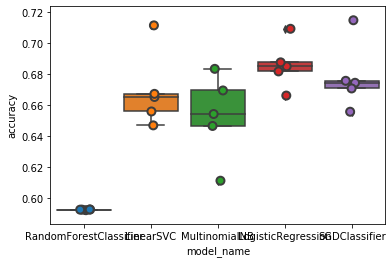

model_name
LinearSVC                 0.669496
LogisticRegression        0.686102
MultinomialNB             0.653107
RandomForestClassifier    0.592609
SGDClassifier             0.678405
Name: accuracy, dtype: float64

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
models = [
    RandomForestClassifier(n_estimators=500, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SGDClassifier()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, counts, target, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.688192
LogisticRegression        0.671466
MultinomialNB             0.638364
RandomForestClassifier    0.592609
SGDClassifier             0.687199
Name: accuracy, dtype: float64